In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('dados_filtrados_v4.csv')

In [2]:
df = df.drop(columns=['Data de Nascimento', 'ID Aluno'])

In [3]:
corr = df.corr()
corr[corr > 0.3]

,Sexo,Cotista,Tipo de Escola,Raça,Curso,Período de Ingresso na Unb,Período de saída da opção,Ano e Semestre,Média do período,Créditos cursados no total,Créditos cursados no semestre(com aprovação),Código da disciplina,Créditos disciplina,Menção na disciplina,semestre,idade,saiu
Sexo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cotista,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo de Escola,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Raça,NaN,NaN,NaN,1.000000,NaN,0.469545,NaN,0.454150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Curso,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Período de Ingresso na Unb,NaN,NaN,NaN,0.469545,NaN,1.000000,NaN,0.958453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Período de saída da opção,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ano e Semestre,NaN,NaN,NaN,0.454150,NaN,0.958453,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Média do período,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.423218,0.737063,NaN,NaN,0.618752,NaN,NaN,NaN
Créditos cursados no total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423218,1.000000,0.488923,NaN,NaN,0.307774,0.378100,NaN,NaN


In [4]:
def get_age_range(age):
    if age <= 20: return 'ate 20'
    if age <= 25: return '21-25'
    if age <= 30: return '26-30'
    if age <= 35: return '31-35'
    return 'maior que 35'

In [5]:
df['intervalo_idade'] = df['idade'].apply(get_age_range)

In [6]:
import math
def percetage(x, pos):
    return "%.1f" % (x * 100) + "%"
formatter = FuncFormatter(percetage)
plt.rcParams['figure.figsize'] = (25, 7)

def display_reprovation_graph(dataFrame):
    
    semestres = dataFrame['semestre'].unique()
    semestres.sort()
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    
    b = np.zeros((len(semestres), 3))
    for i, semestre in enumerate(semestres):
        a = df[df["semestre"] == semestre]
        b[i] = np.array([a[a["Menção na disciplina"] >=3]["Menção na disciplina"].count() / a["Menção na disciplina"].count(),
                         semestre, int(a["Menção na disciplina"].count())])
    
    #plt.rcParams['figure.figsize'] = (math.ceil(0.5 * b[:,1].size), 7)
    plt.bar(b[:,1], b[:,0], width=.2)
    plt.xticks(b[:,1], [str(x) + ' s' for x in b[:,1]])
    plt.show()

ate 20


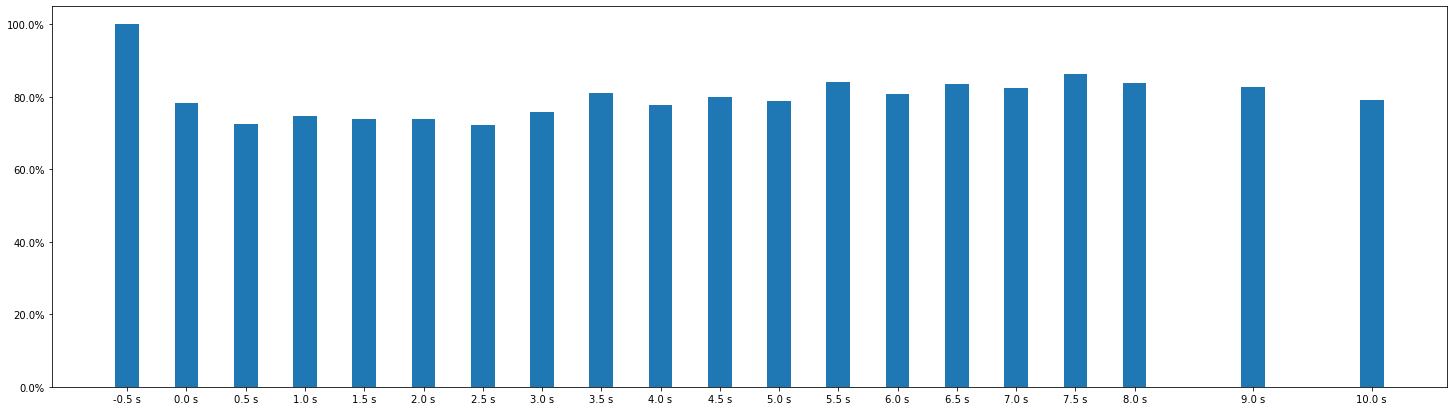

21-25


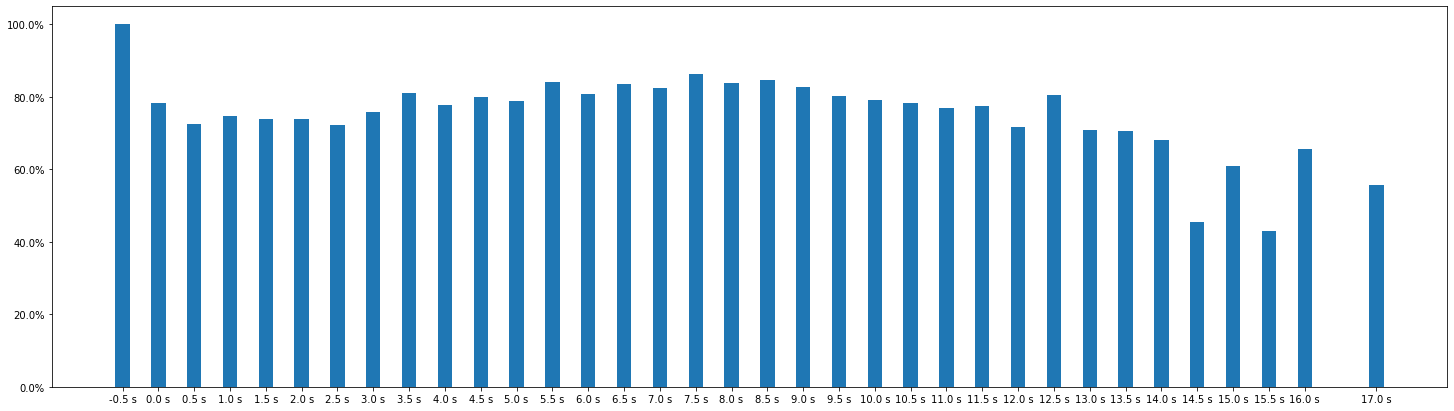

26-30


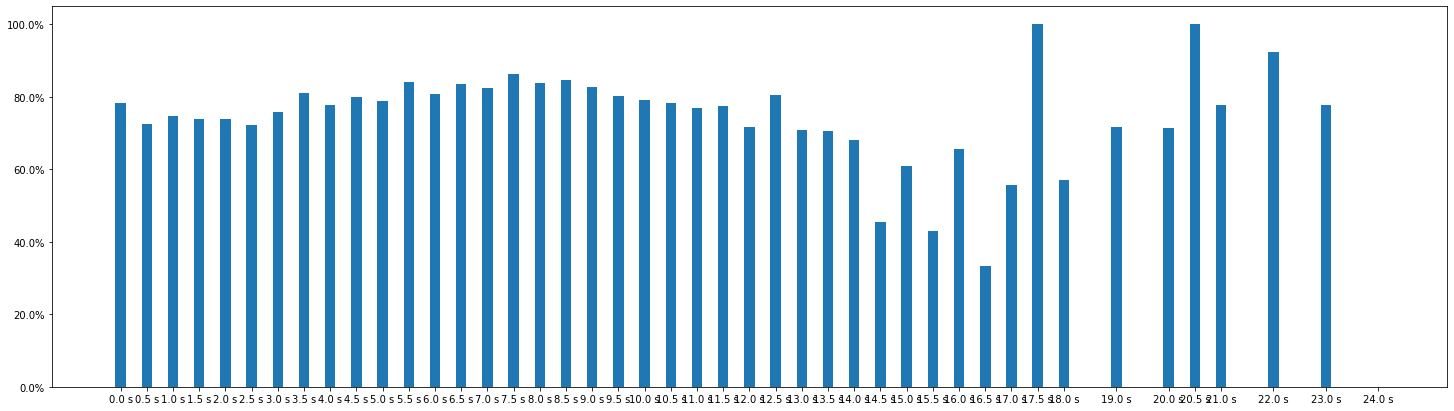

31-35


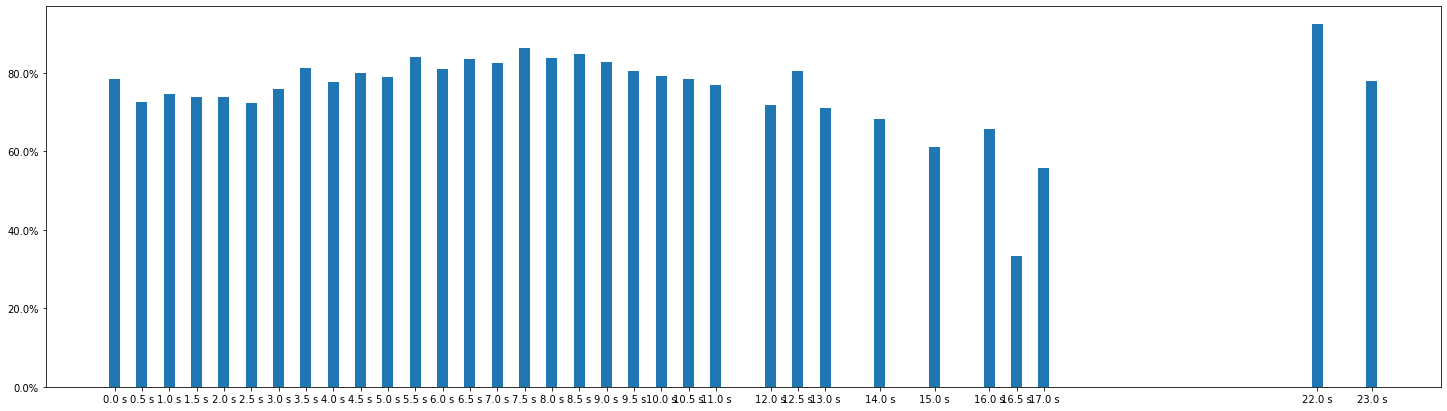

maior que 35


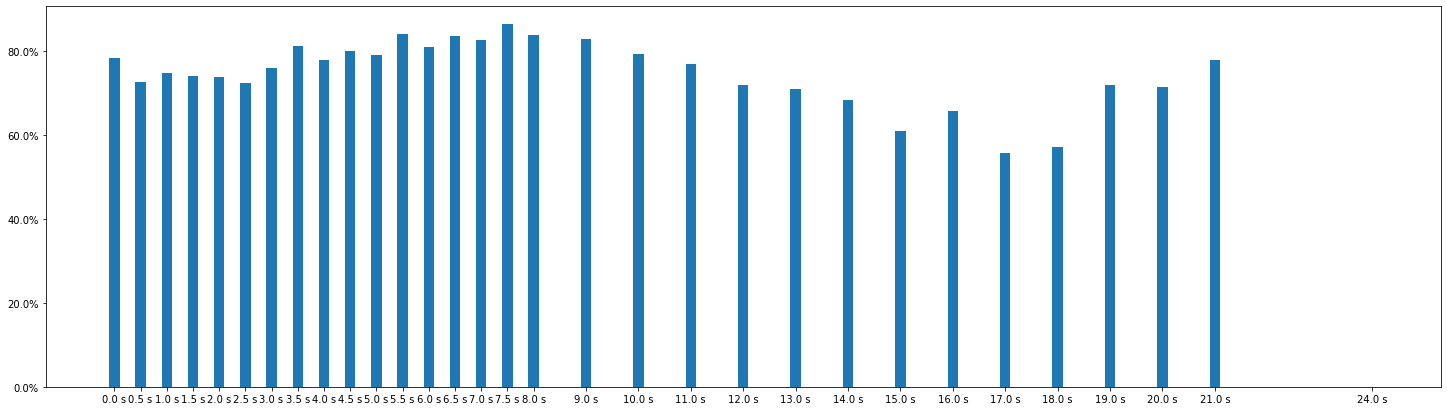

In [7]:
allIntervals = df['intervalo_idade'].unique()
for interval in allIntervals:
    print(interval)
    display_reprovation_graph(df[df['intervalo_idade'] == interval])

In [8]:
b = df.groupby('Código da disciplina').count()
a = b[b['Sexo'] >= 500]
a.count()

Sexo                                            147
Cotista                                         147
Tipo de Escola                                  147
Raça                                            147
Curso                                           147
Período de Ingresso na Unb                      147
Período de saída da opção                       147
Ano e Semestre                                  147
Média do período                                147
Créditos cursados no total                      147
Créditos cursados no semestre(com aprovação)    147
Créditos disciplina                             147
Menção na disciplina                            147
semestre                                        147
idade                                           147
saiu                                            147
intervalo_idade                                 147
dtype: int64